In [1]:
import pandas as pd
import numpy as np
from ExperimentSetting import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

branch_probability_thresholds=[1000,2000,5000,10000]
filter_approaches=['probability']
df_names=['breast cancer','iris','winery']
#number_of_estimators_list=[200,100,50,10]
number_of_estimators_list=[3,5,20,50,100]
fixed_params={}
num_of_iterations=30
experimentSetting1=ExperimentSetting(branch_probability_thresholds,df_names,
                                     number_of_estimators_list,fixed_params,num_of_iterations,filter_approaches)

In [ ]:
%%prun
experimentSetting1.run()

In [ ]:
df.columns


In [4]:
df=pd.DataFrame(experimentSetting1.experiments)
groups=['df_name','number_of_estimators','max_number_of_branches']
df[[col for col in df.columns if 'accuracy' in col]+groups].groupby(groups).mean()

decision_tree_accuracy  \
df_name       number_of_estimators max_number_of_branches                           
breast cancer 3                    1000                                  0.945528   
                                   2000                                  0.944715   
                                   5000                                  0.944715   
                                   10000                                 0.946829   
              5                    1000                                  0.943740   
                                   2000                                  0.948618   
                                   5000                                  0.945854   
                                   10000                                 0.946504   
              20                   1000                                  0.942439   
                                   2000                                  0.948455   
                                   5000                                  0.945854   
                                   10000                                 0.946504   
              50                   1000                                  0.948780   
                                   2000                                  0.944390   
                                   5000                                  0.944390   
                                   10000                                 0.942114   
              100                  1000                                  0.945366   
                                   2000                                  0.945691   
                                   5000                                  0.940488   
                                   10000                                 0.946504   
iris          3                    1000                                  0.940000   
                                   2000                                  0.940000   
                                   5000                                  0.944444   
                                   10000                                 0.942222   
              5                    1000                                  0.938519   
                                   2000                                  0.942222   
                                   5000                                  0.942222   
                                   10000                                 0.948148   
              20                   1000                                  0.953333   
                                   2000                                  0.939259   
                                   5000                                  0.942963   
                                   10000                                 0.946667   
              50                   1000                                  0.946667   
                                   2000                                  0.940000   
                                   5000                                  0.948148   
                                   10000                                 0.945926   
              100                  1000                                  0.939259   
                                   2000                                  0.934815   
                                   5000                                  0.936296   
                                   10000                                 0.930370   
winery        3                    1000                                  0.932716   
                                   2000                                  0.911111   
                                   5000                                  0.910494   
                                   10000                                 0.929012   
              5                    1000                                  0.918519   
                                   2000                         

In [5]:
df.to_csv('results_10_6_18.csv')

In [6]:
df[[col for col in df.columns if 'auc' in col]+groups].groupby(groups).mean()

decision_tree_auc  \
df_name       number_of_estimators max_number_of_branches                      
breast cancer 3                    1000                             0.967218   
                                   2000                             0.969197   
                                   5000                             0.964988   
                                   10000                            0.968364   
              5                    1000                             0.964017   
                                   2000                             0.962583   
                                   5000                             0.964393   
                                   10000                            0.968588   
              20                   1000                             0.962653   
                                   2000                             0.968463   
                                   5000                             0.961866   
                                   10000                            0.965704   
              50                   1000                             0.964003   
                                   2000                             0.969475   
                                   5000                             0.965668   
                                   10000                            0.968181   
              100                  1000                             0.966378   
                                   2000                             0.966926   
                                   5000                             0.966402   
                                   10000                            0.966603   
iris          3                    1000                             0.962745   
                                   2000                             0.970807   
                                   5000                             0.966617   
                                   10000                            0.969214   
              5                    1000                             0.963461   
                                   2000                             0.969617   
                                   5000                             0.970272   
                                   10000                            0.973667   
              20                   1000                             0.972597   
                                   2000                             0.962387   
                                   5000                             0.963679   
                                   10000                            0.971152   
              50                   1000                             0.972605   
                                   2000                             0.967914   
                                   5000                             0.971148   
                                   10000                            0.967148   
              100                  1000                             0.966514   
                                   2000                             0.965967   
                                   5000                             0.969053   
                                   10000                            0.961181   
winery        3                    1000                             0.953306   
                                   2000                             0.935662   
                                   5000                             0.938480   
                                   10000                            0.953152   
              5                    1000                             0.946925   
                                   2000                             0.940809   
                                   5000                             0.945545   
                                   10000                            0.945196   
              20                   1000                    

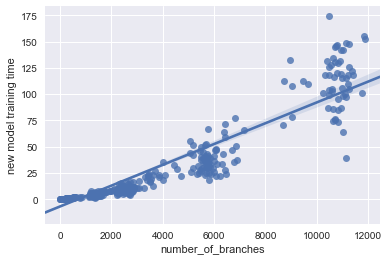

In [8]:
sns.regplot(x='number_of_branches',y='new model training time',data=df[df['df_name']=='iris'])

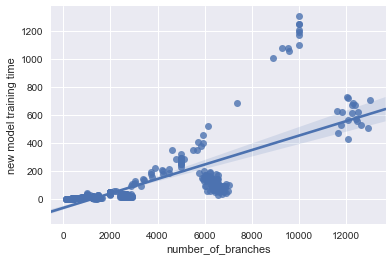

In [9]:
sns.regplot(x='number_of_branches',y='new model training time',data=df[df['df_name']=='winery'])

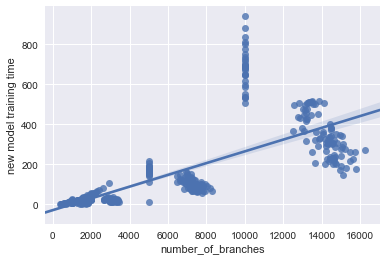

In [12]:
sns.regplot(x='number_of_branches',y='new model training time',data=df[df['df_name']=='breast cancer'])

In [ ]:
[col for col in df.columns if 'time' in col]

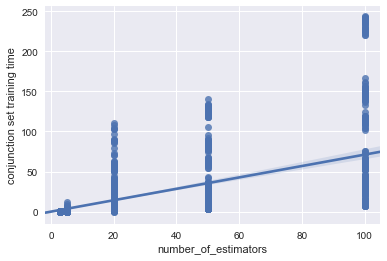

In [13]:
sns.regplot(x='number_of_estimators',y='conjunction set training time',data=df)

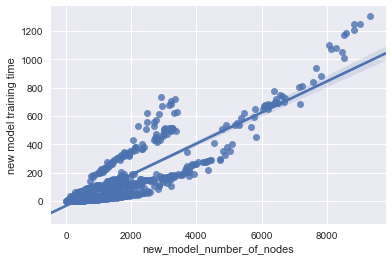

In [14]:
sns.regplot(x='new_model_number_of_nodes',y='new model training time',data=df)

In [ ]:
df=pd.DataFrame(experimentSetting1.experiments)
df[[col for col in df.columns if 'time' in col]+groups].groupby(groups).mean()

In [15]:
df[[col for col in df.columns if 'average_depth' in col]+groups].groupby(groups).mean()

decision_tree_average_depth  \
df_name       number_of_estimators max_number_of_branches                                
breast cancer 3                    1000                                       3.313496   
                                   2000                                       3.132520   
                                   5000                                       3.305691   
                                   10000                                      3.116423   
              5                    1000                                       3.203902   
                                   2000                                       3.240813   
                                   5000                                       3.137236   
                                   10000                                      3.179187   
              20                   1000                                       3.236911   
                                   2000                                       3.215935   
                                   5000                                       3.296423   
                                   10000                                      3.234472   
              50                   1000                                       3.263577   
                                   2000                                       3.127480   
                                   5000                                       3.272683   
                                   10000                                      3.273333   
              100                  1000                                       3.253496   
                                   2000                                       3.037236   
                                   5000                                       3.158699   
                                   10000                                      3.278049   
iris          3                    1000                                       2.280741   
                                   2000                                       2.289630   
                                   5000                                       2.314815   
                                   10000                                      2.317037   
              5                    1000                                       2.260741   
                                   2000                                       2.231111   
                                   5000                                       2.240741   
                                   10000                                      2.314815   
              20                   1000                                       2.329630   
                                   2000                                       2.277778   
                                   5000                                       2.302222   
                                   10000                                      2.277037   
              50                   1000                                       2.328148   
                                   2000                                       2.246667   
                                   5000                                       2.260000   
                                   10000                                      2.285185   
              100                  1000                                       2.302963   
                                   2000                                       2.234074   
                                   5000                                       2.269630   
                                   10000                                      2.217037   
winery        3                    1000                                       2.690123   
                                   2000                                       2.677778   
                                   5000                                       2.796296   
         

In [ ]:
df[df['new_model_accuracy']!=df['ensemble_accuracy']][['df_name','new_model_accuracy','ensemble_accuracy']]

In [ ]:
df.to_csv('experiment_7_6_18.csv')

In [ ]:
for i,j in zip(df.iloc[80]['new_model_probas'],df.iloc[80]['ensemble_probas']):
    if np.argmax(i)!=np.argmax(j):
        print(i)
        print(j)
        print('------------------')